In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
historical_data = pd.read_csv('../data/curated/historical_data.csv')
historical_data = historical_data[["type", "suburb", "Median", "Date"]]

In [116]:
predicted_data = pd.read_csv('../data/curated/forecast_data.csv')

In [117]:
# Converting the Date column to datetime
historical_data["Date"] = pd.to_datetime(historical_data["Date"])
predicted_data["Date"] = pd.to_datetime(predicted_data["Date"])

In [118]:
# Remove pre 2023-03-31 data from predicted data
predicted_data = predicted_data[predicted_data["Date"] > "2023-03-31"]

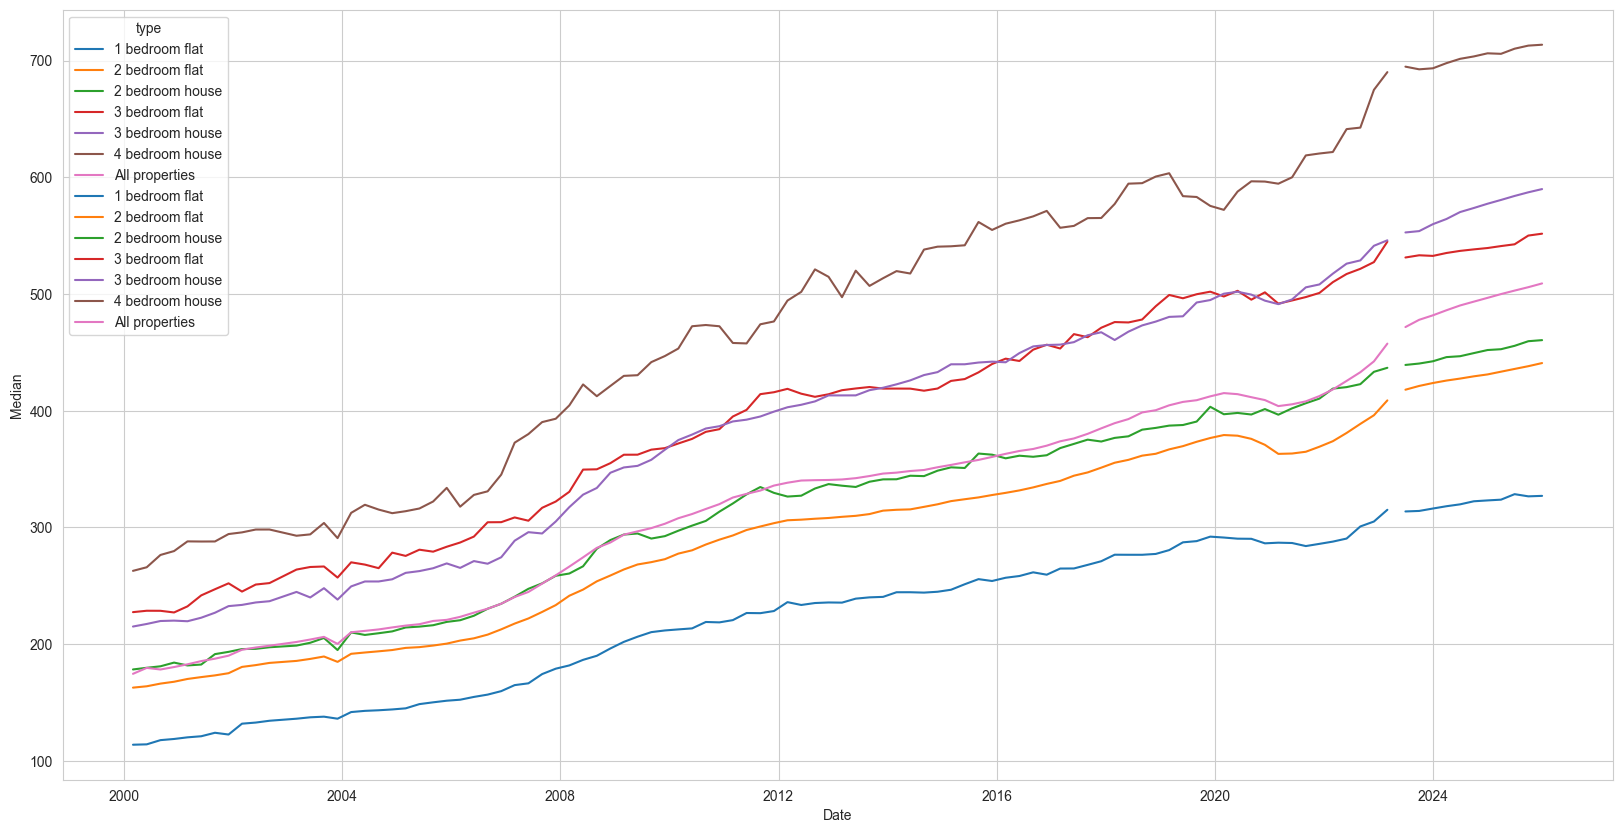

In [119]:
# Plotting the historical data and the predicted data for all suburbs and types
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(data=historical_data, x="Date", y="Median", hue="type", ax=ax, errorbar=None)
sns.lineplot(data=predicted_data, x="Date", y="Median", hue="type", ax=ax, errorbar=None)
plt.show()

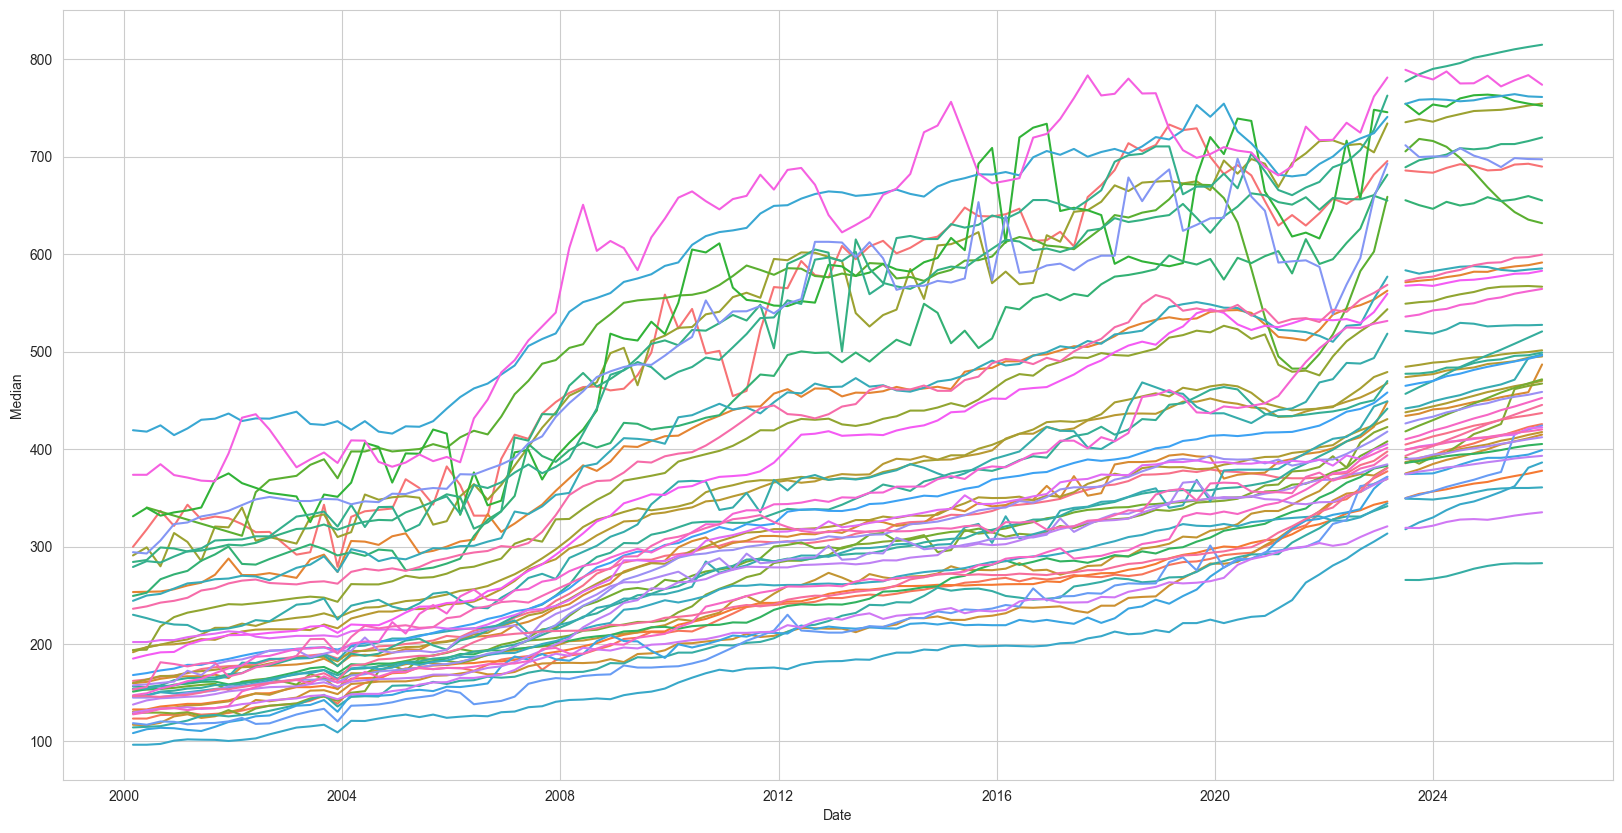

In [120]:
# Plotting the historical data and the predicted data for all suburbs and types
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(data=historical_data, x="Date", y="Median", hue="suburb", ax=ax, errorbar=None)
sns.lineplot(data=predicted_data, x="Date", y="Median", hue="suburb", ax=ax, errorbar=None)
plt.legend().remove()
plt.show()

In [121]:
# Create a dataframe with the latest historical and the predicted median prices for all suburbs and types
latest_historical_data = historical_data[historical_data["Date"] == historical_data["Date"].max()]
latest_predicted_data = predicted_data[predicted_data["Date"] == predicted_data["Date"].max()]
# Merge the two dataframes
latest_data = pd.merge(latest_historical_data, latest_predicted_data, on=["type", "suburb"],
                       suffixes=('_historical', '_predicted'))

In [122]:
latest_data

,type,suburb,Median_historical,Date_historical,Date_predicted,Median_predicted,Lower,Upper
0,1 bedroom flat,Altona,287.0,2023-03-01,2025-12-31,294.355947,249.869315,338.842580
1,2 bedroom flat,Altona,370.0,2023-03-01,2025-12-31,390.580819,351.244449,429.917189
2,2 bedroom house,Altona,380.0,2023-03-01,2025-12-31,404.365448,365.676060,443.054836
3,3 bedroom flat,Altona,430.0,2023-03-01,2025-12-31,463.653173,419.576426,507.729919
4,3 bedroom house,Altona,420.0,2023-03-01,2025-12-31,527.320431,452.178330,602.462532
...,...,...,...,...,...,...,...,...
298,2 bedroom house,Wodonga,363.0,2023-03-01,2025-12-31,367.951169,306.541716,429.360623
299,3 bedroom flat,Wodonga,400.0,2023-03-01,2025-12-31,464.307244,402.628432,525.986057
300,3 bedroom house,Wodonga,420.0,2023-03-01,2025-12-31,500.363758,449.072248,551.655269
301,4 bedroom house,Wodonga,500.0,2023-03-01,2025-12-31,588.882672,529.968129,647.797215


In [123]:
# Plotting the latest historical and predicted median prices for all suburbs and types
latest_data["Growth"] = latest_data["Median_predicted"] - latest_data["Median_historical"]
latest_data["Growth Percentage"] = (latest_data["Growth"] / latest_data["Median_historical"]) * 100

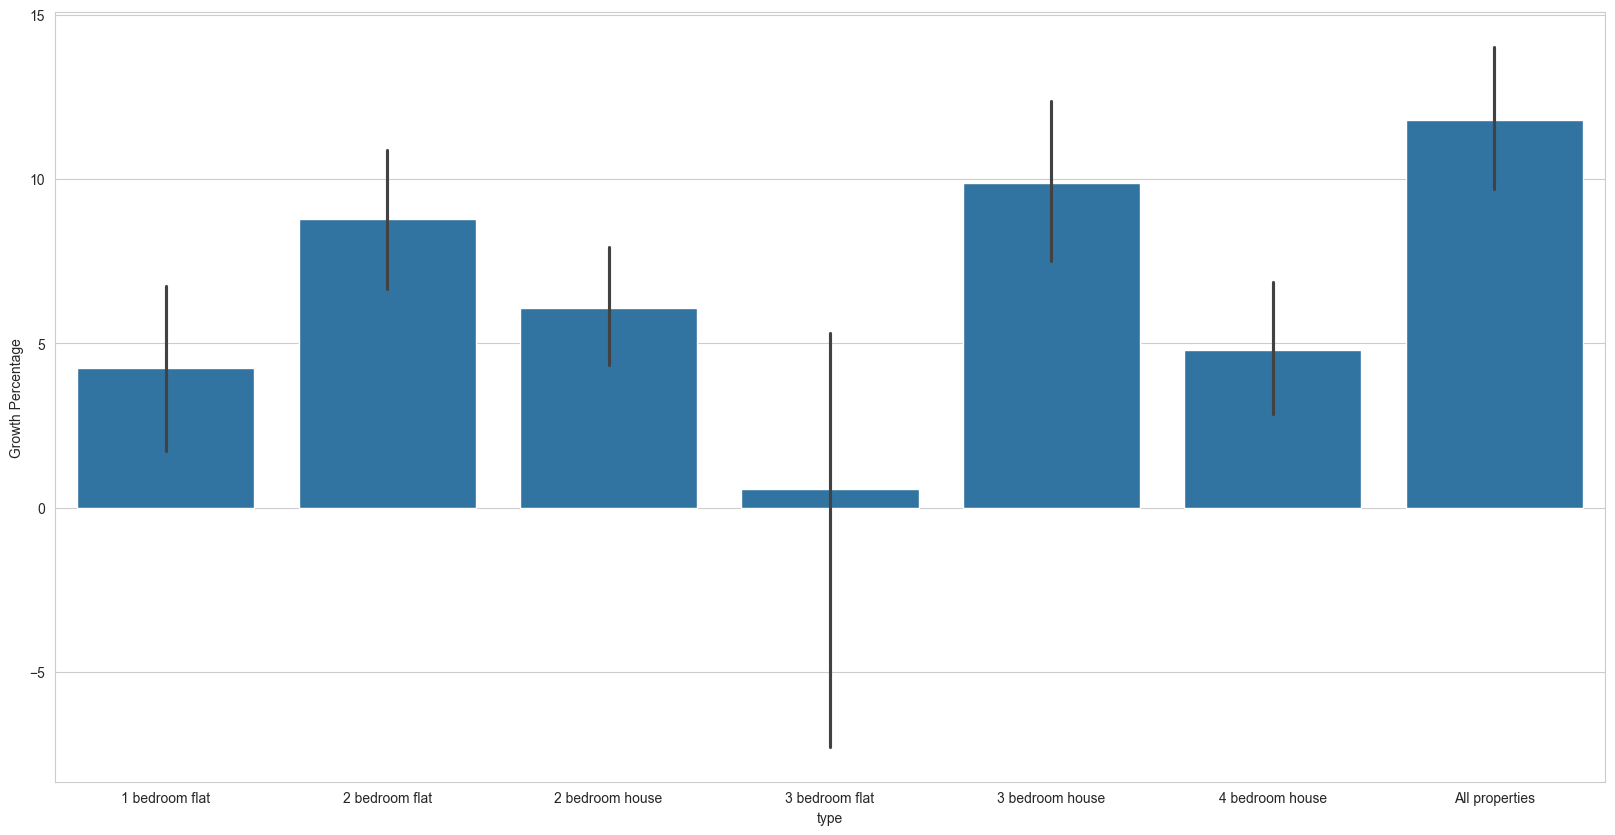

In [124]:
# Plot the growth percentage for all suburbs and types
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=latest_data, x="type", y="Growth Percentage", ax=ax)
plt.show()

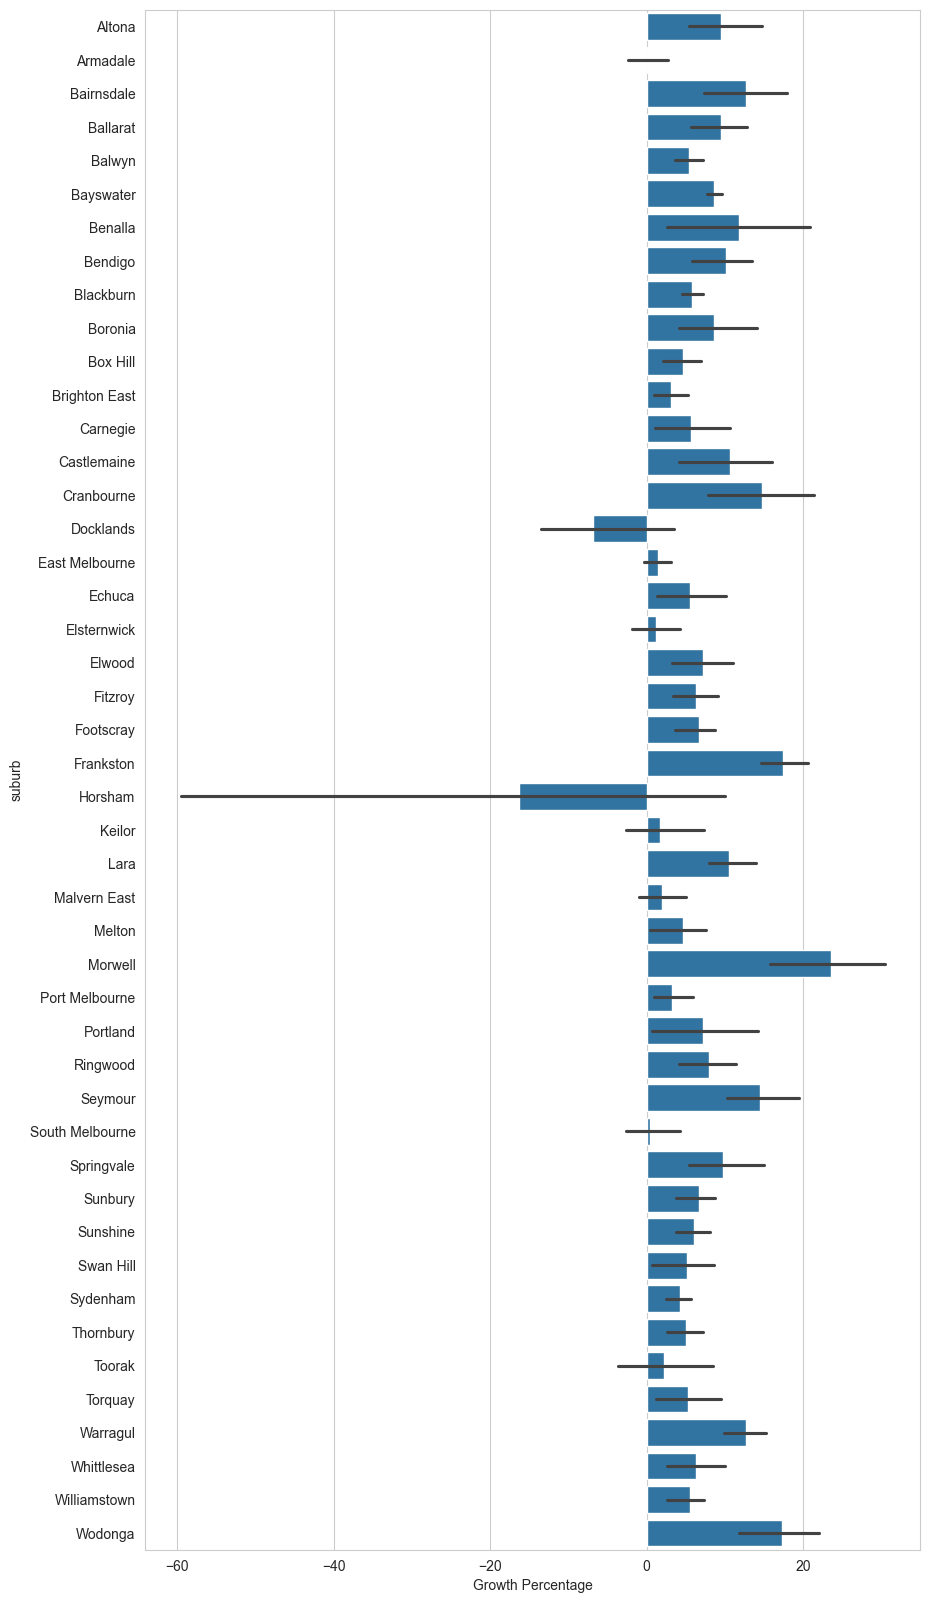

In [125]:
fig, ax = plt.subplots(figsize=(10, 20))
sns.barplot(data=latest_data, y="suburb", x="Growth Percentage", ax=ax, orient="h")
plt.show()

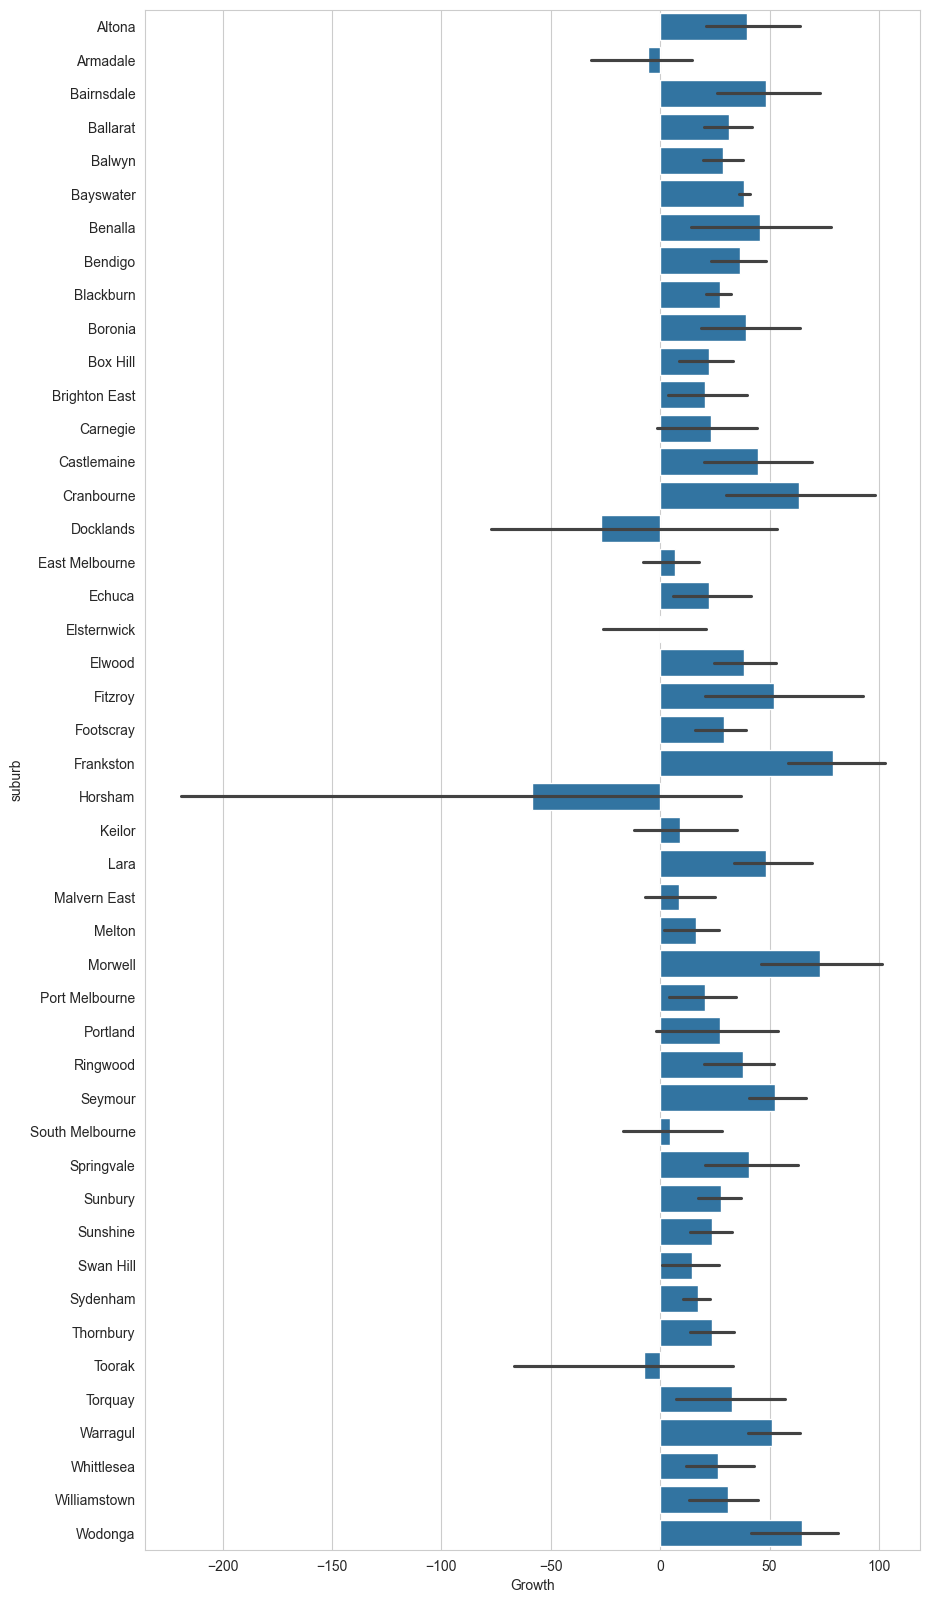

In [126]:
fig, ax = plt.subplots(figsize=(10, 20))
sns.barplot(data=latest_data, y="suburb", x="Growth", ax=ax, orient="h")
plt.show()

In [127]:
top_10_suburbs = latest_data.groupby("suburb").agg({"Growth": "sum"}).sort_values("Growth", ascending=False).head(10)
top_10_suburbs

,Growth
suburb,
Frankston,554.421717
Wodonga,453.874737
Cranbourne,445.270546
Morwell,437.211459
Fitzroy,365.315634
Bairnsdale,338.930144
Benalla,318.571900
Warragul,306.286289
Springvale,285.232671


In [128]:
historical_data_top_10 = historical_data[historical_data["suburb"].isin(top_10_suburbs.index)]
predicted_data_top_10 = predicted_data[predicted_data["suburb"].isin(top_10_suburbs.index)]

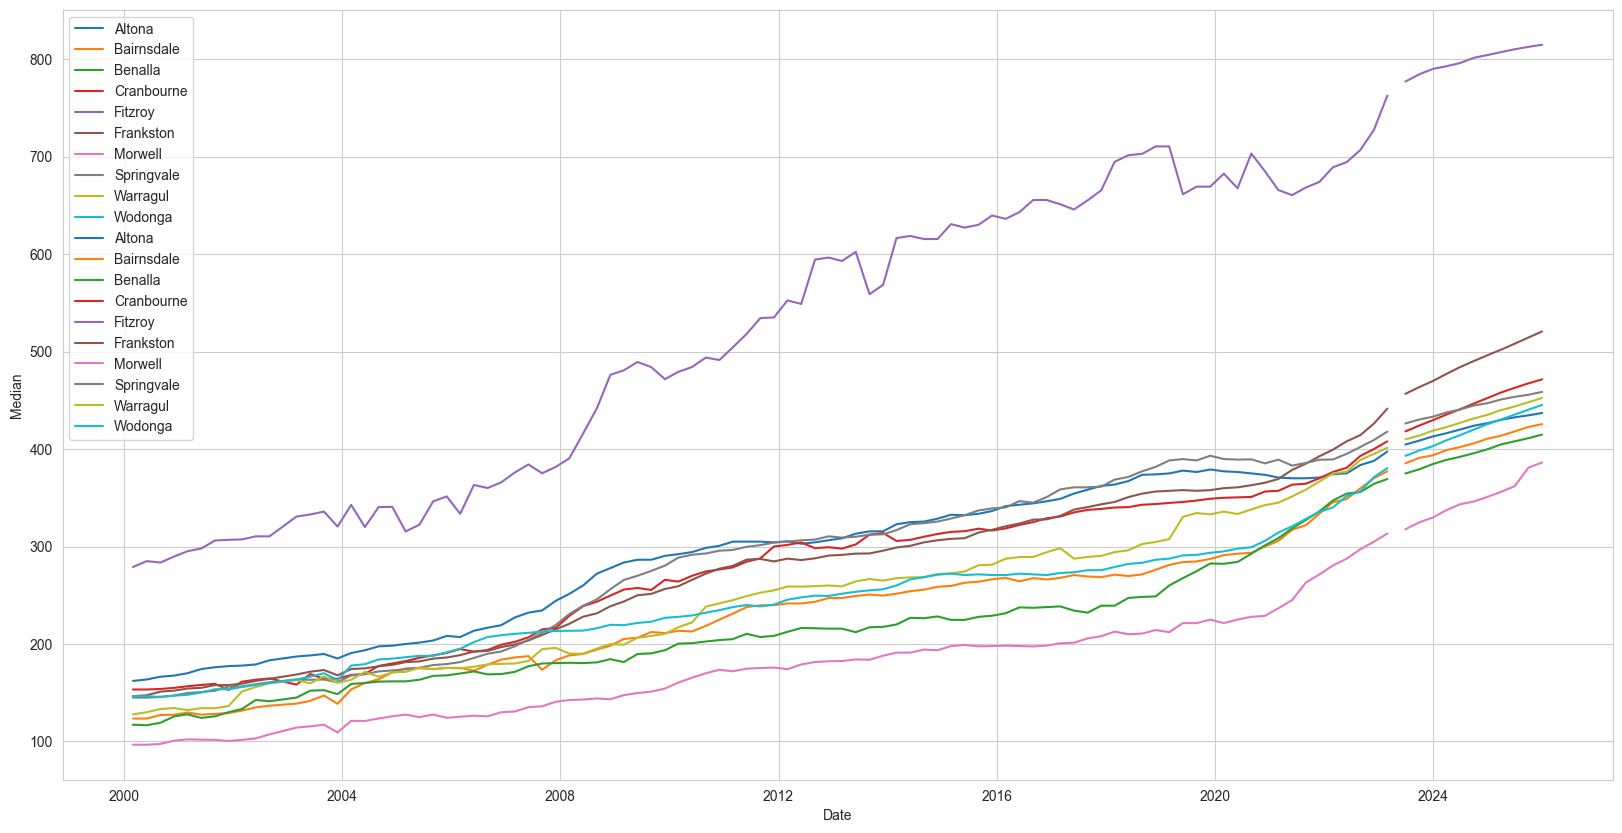

In [129]:
# Plotting the historical data and the predicted data for all suburbs and types
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(data=historical_data_top_10, x="Date", y="Median", hue="suburb", ax=ax, errorbar=None)
sns.lineplot(data=predicted_data_top_10, x="Date", y="Median", hue="suburb", ax=ax, errorbar=None)
plt.legend()
plt.show()

In [131]:
worst_10_suburbs = latest_data.groupby("suburb").agg({"Growth": "sum"}).sort_values("Growth", ascending=True).head(10)
historical_data_bottom_10 = historical_data[historical_data["suburb"].isin(worst_10_suburbs.index)]
predicted_data_bottom_10 = predicted_data[predicted_data["suburb"].isin(worst_10_suburbs.index)]

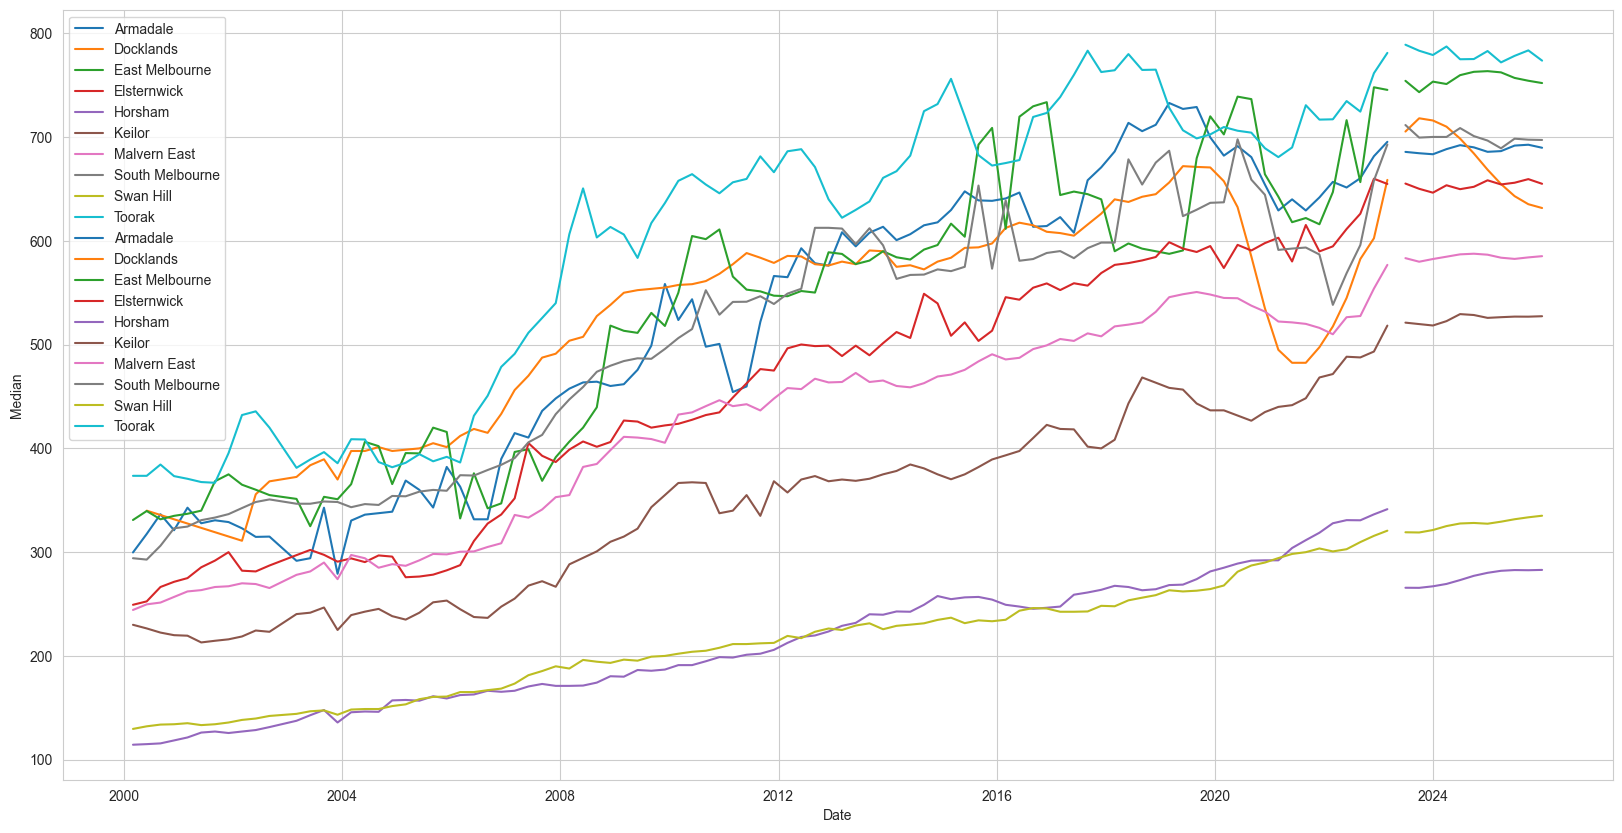

In [132]:
# Plotting the historical data and the predicted data for all suburbs and types
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(data=historical_data_bottom_10, x="Date", y="Median", hue="suburb", ax=ax, errorbar=None)
sns.lineplot(data=predicted_data_bottom_10, x="Date", y="Median", hue="suburb", ax=ax, errorbar=None)
plt.legend()
plt.show()